## Notebook for Generating Figures

In [1]:
# this code is for an elaine problem
import sys
sys.path.append('/Users/elainecunha/opt/anaconda3/envs/py3.8/lib/python3.8/site-packages')

In [2]:
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

In [3]:
def split_data(data, dim=2):
    '''Splits data into separate numpy arrays for 
       time, x, y, z (if dim=3) and theta. If dim=2,
       returns an empty numpy array for z.'''

    t = []
    x = []
    y = []
    z = []
    theta = []

    for row in data:
        t.append([row[0]])
        x.append(row[1:data.shape[1]:3])
        y.append(row[2:data.shape[1]:3])
        if dim==2:
            theta.append(row[3:data.shape[1]:3])
        else:
            z.append(row[3:data.shape[1]:3])
            theta.append(row[4:data.shape[1]:3])
            

    return np.array(t),np.array(x),np.array(y),np.array(z),theta

In [4]:
def f(theta):
    '''Helper function for converting
       theta to a color.'''
    return 0.45*(1.+np.cos(theta))

def theta_rgb(theta):
    '''Converts theta to RGB colors.'''
    rgb=[]
    for th in theta:
        rgb.append([f(th), f(th-2.*np.pi/3.), f(th+2.*np.pi/3.)])
    return np.array(rgb)

In [135]:
def plot(t,x,y,z,theta,title):
    '''Plots data in either 2D or 3D.'''

    if len(z)==0:
        fig,ax = plt.subplots(5,1, figsize=(5,25))
    else:
        fig,ax = plt.subplots(5,1, figsize=(5,25), subplot_kw=dict(projection='3d'))

    for j,ax in enumerate(ax.flat):
        
        # format plot
        ax.set_xlabel('x', fontsize=12)
        ax.set_ylabel('y', fontsize=12)
        ax.tick_params(axis='both', which='major', labelsize=12)
        ax.set_ylim([-1.5,1.5])
        ax.set_xlim([-1.5,1.5])
        ax.set_title('Snapshot at t={}'.format(int(t[j])), fontsize=12)
        ax.set_aspect('equal', adjustable='box')
        
        # plot data
        if len(z)==0:
            ax.scatter(x[j], y[j], color=theta_rgb(theta[j]))
        else:
            ax.scatter3D(x[j], y[j], z[j], color=theta_rgb(theta[j]))
            ax.set_zlim([-1.5,1.5])
            ax.set_zlabel('z', fontsize=12)

    return fig,ax

In [28]:
# load data
results = "test_finite"
filepath = "/Users/elainecunha/Desktop/Spring_2021/AM_225/Project/am225_swarmilators/" + results + ".txt"
data = np.loadtxt(filepath)

In [29]:
data[::80000].shape

(10, 31)

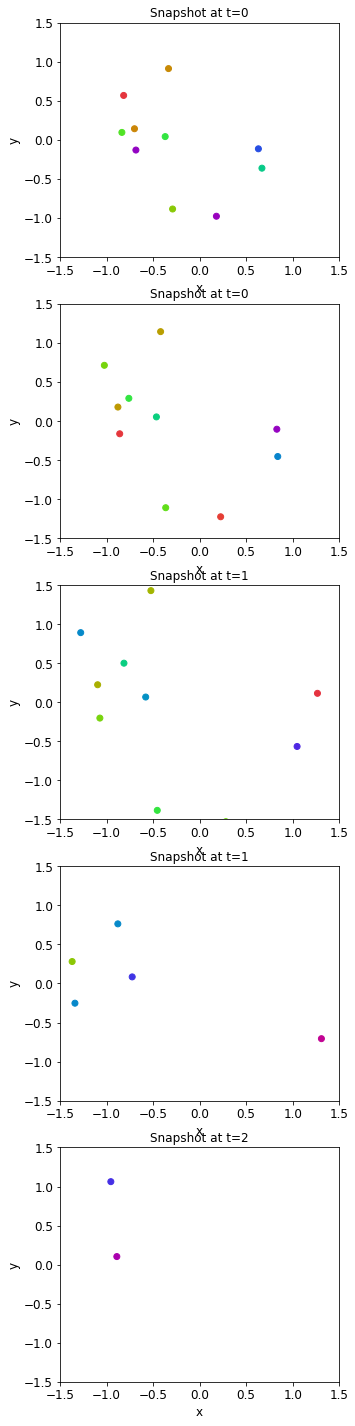

In [27]:
# process data into separate arrays
t,x,y,z,theta = split_data(data[::80000])
# z = np.copy(y)

# plot data
title = ['$J=0.5, K=0.5$']
fig,ax = plot(t,x,y,z,theta,title)
plt.show()

## Test 3D

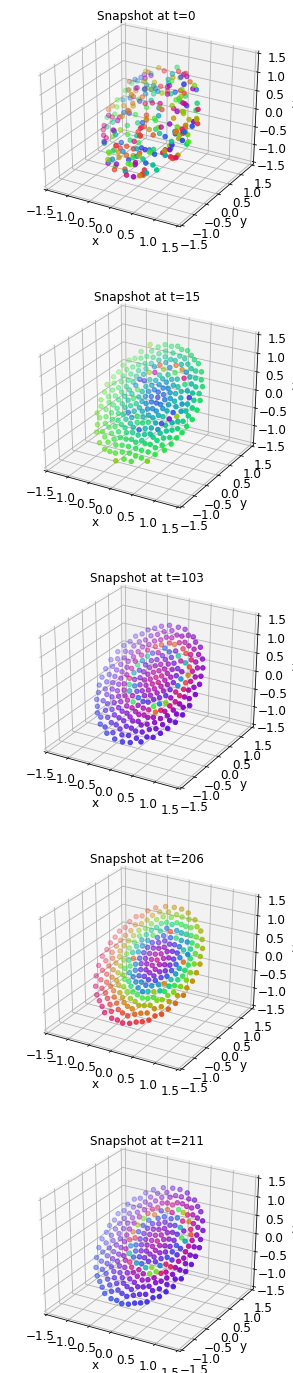

In [12]:
# process data into separate arrays
t,x,y,z,theta = split_data(data[::2000])
z = np.copy(y)

# plot data
title = ['$J=0.5, K=0.5$']
fig,ax = plot(t,x,y,z,theta,title)
plt.show()

# fig.savefig('figs/' + results + '.png')

## Elaine is playing around with making a video...

In [6]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [7]:
from matplotlib import rc
from IPython.display import HTML

In [15]:
def update_plot(i, x, y, color_data, scat):
    xy = np.c_[x[i], y[i]]
    scat.set_offsets(xy)
#     scat.set_array(color_data[i])
    return scat,

def main(data):
    
    t,x,y,z,theta = split_data(data)
    color_data = [theta_rgb(i) for i in theta]

    # Setup the figure and axes...
    fig, ax = plt.subplots(1,1)

    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_ylim([-1.5,1.5])
    ax.set_xlim([-1.5,1.5])
        
    scat = ax.scatter(x[0], y[0], color=color_data[0])

    ani = animation.FuncAnimation(fig, update_plot, frames=np.arange(1,x.shape[0],500),
                                  fargs=(x, y, color_data, scat),repeat=True)
    
#     return HTML(ani.to_html5_video())
    return plt.show()

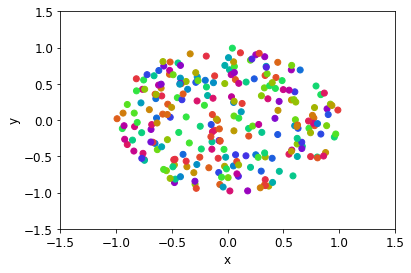

In [16]:
main(data)

## SCRATCH FOR DEBUGGING

In [32]:
s = np.array([[3,1,0,0.631164,-0.113229],
[1,1,3,-0.836654,0.0964957],
[1,2,6,-0.701309,0.143638],
[2,1,9,0.179679,-0.97665],
[1,3,12,-0.685968,-0.129135],
[1,4,15,-0.33527,0.913791],
[1,5,18,-0.371127,0.043099],
[1,6,21,-0.817685,0.570011],
[0,1,24,-0.291505,-0.884071],
[2,2,27,0.669246,-0.361333]])

In [33]:
s.shape

(10, 5)

In [51]:
max(s[:,4])
min(s[:,4])

-0.97665

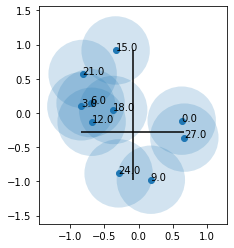

In [137]:
fig,ax = plt.subplots(1,1)
ax.scatter(s[:,3],s[:,4])
ax.hlines((max(s[:,4])+min(s[:,4]))/2.-0.25, min(s[:,3]), max(s[:,3]))
ax.vlines((max(s[:,3])+min(s[:,3]))/2., min(s[:,4]), max(s[:,4]))
for i, label in enumerate(s[:,2]):
    plt.annotate(label, (s[i,3],s[i,4]))
    circle = plt.Circle((s[i,3],s[i,4]), 0.5, alpha=0.2)
    ax.add_patch(circle)
    ax.set_aspect('equal', adjustable='box')

In [143]:
# load data
results = "test_finite"
filepath = "/Users/elainecunha/Desktop/Spring_2021/AM_225/Project/am225_swarmilators/" + results + ".txt"
data2 = np.loadtxt(filepath)

In [123]:
data2.shape

(491, 751)

In [118]:
data = data2[-250:,:]

In [116]:
data = data2[:250,:]

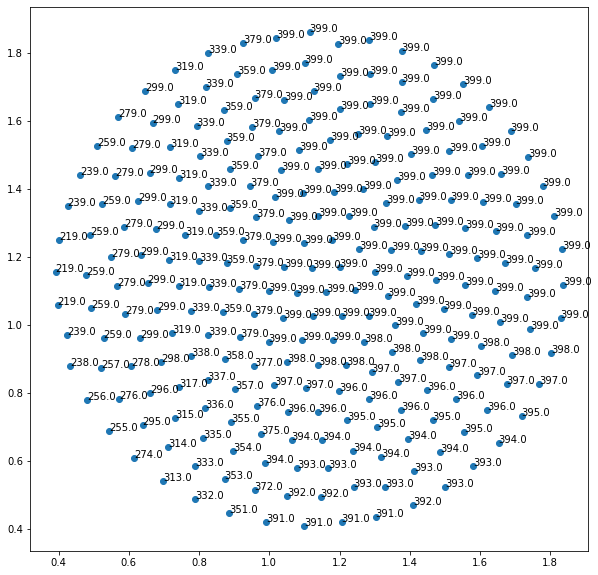

In [119]:
fig,ax = plt.subplots(1,1, figsize=(10,10))
ax.scatter(data[:,1],data[:,2])
# ax.hlines((max(s[:,4])+min(s[:,4]))/2.-0.25, min(s[:,3]), max(s[:,3]))
# ax.vlines((max(s[:,3])+min(s[:,3]))/2., min(s[:,4]), max(s[:,4]))
for i, label in enumerate(data[:,0]):
    plt.annotate(label, (data[i,1],data[i,2]))
#     circle = plt.Circle((s[i,3],s[i,4]), 0.5, alpha=0.2)
#     ax.add_patch(circle)
plt.show()

In [125]:
data2[::100].shape

(5, 751)

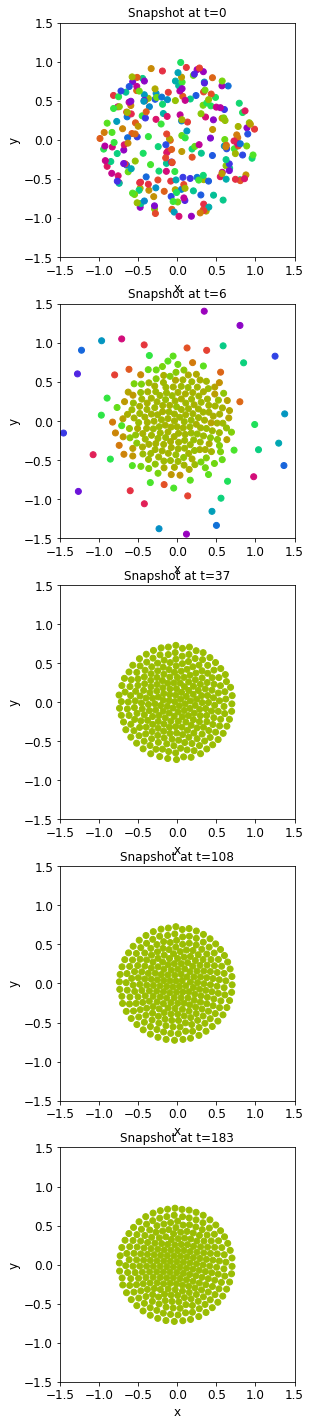

In [144]:
# process data into separate arrays
t,x,y,z,theta = split_data(data2[::100])
# z = np.copy(y)

# plot data
title = ['$J=0.5, K=0.5$']
fig,ax = plot(t,x,y,z,theta,title)
plt.show()

# fig.savefig('figs/' + results + '.png')